In [26]:
# HIDDEN
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

## Confidence Interval for a Population Median: Bootstrap  Percentile Method##

We will now use the bootstrap method to estimate an unknown population median. The data come from a sample of newborns in a large hospital system; we will treat it as if it were a simple random sample.

The table baby contains the following variables for mother-baby pairs: the baby’s birth weight in ounces, the number of gestational days, the mother’s age in completed years, the mother’s height in inches, pregnancy weight in pounds, and whether or not the mother smoked during pregnancy.

In [27]:
births = Table.read_table('baby.csv')
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


In [5]:
babies = births.select('Birth Weight', 'Gestational Days')
babies

Birth Weight,Gestational Days
120,284
113,282
128,279
108,282
136,286
138,244
132,245
120,289
143,299
140,351


Birth weight is an important factor in the health of a newborn infant – smaller babies tend to need more medical care in their first days than larger newborns. It is therefore helpful to have an estimate of birth weight before the baby is born. One way to do this is to examine the relationship between birth weight and the number of gestational days.

A simple measure of this relationship is the ratio of birth weight to the number of gestational days (Weight per Day). The updated table  contains the first two columns of baby, as well as a column of the ratios (Weight per Day).

In [6]:
babies = babies.with_column(
    'Weight per Day',
    babies.column('Birth Weight') / babies.column('Gestational Days'))
babies

Birth Weight,Gestational Days,Weight per Day
120,284,0.422535
113,282,0.400709
128,279,0.458781
108,282,0.382979
136,286,0.475524
138,244,0.565574
132,245,0.538776
120,289,0.415225
143,299,0.478261
140,351,0.39886


Here is a histogram of the ratios:

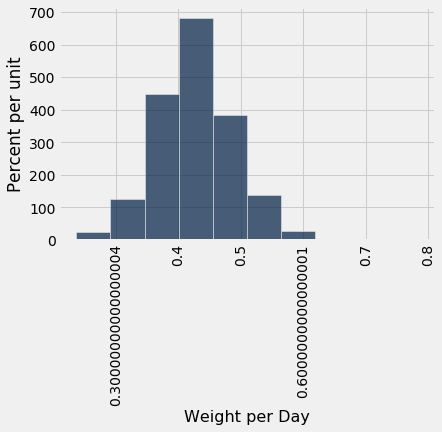

In [7]:
babies.hist('Weight per Day')

The median ratio in the sample:

In [11]:
percentile(50, babies.column('Weight per Day'))

0.42907801418439717

But what was the median in the population? We don’t know, so we will estimate an interval for it.

We will bootstrap the sample 1,000 times resulting in 1,000 estimates of the median. Our 95% confidence interval will be the “middle 95%” of all of our estimates.

In [12]:
# Bootstrap for median

medians = make_array()

for i in np.arange(1000):
    resampled = babies.sample()
    median = percentile(50, resampled.column('Weight per Day'))
    medians = np.append(medians, median)

95% confidence interval:

In [13]:
interval_95 = make_array(percentile(2.5, medians), percentile(97.5, medians))
interval_95

array([0.42545455, 0.43262411])

We just have an interval of estimates. It is a 95% confidence interval of estimates, because the process that generates it produces a good interval about 95% of the time. That certainly beats guessing at random

To visualize our results, let us draw the empirical histogram of our bootstrapped medians and place the confidence interval on the horizontal axis.

95% Confidence Interval for Median Weight/Days ratio
[0.42545455 0.43262411]


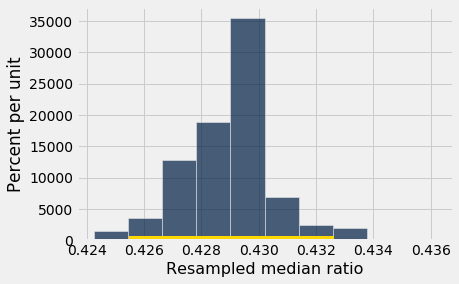

In [16]:
Table().with_column('Resampled median ratio', medians).hist()
plots.plot(interval_95, [0, 0], color='gold', lw=8)
print('95% Confidence Interval for Median Weight/Days ratio')
print(interval_95)

80% confidence interval:

In [17]:
interval_80 = make_array(percentile(10, medians), percentile(90, medians))
interval_80

array([0.42708333, 0.43060498])

80% Confidence interval for median weight/days ratio in population:
[0.427 0.431]


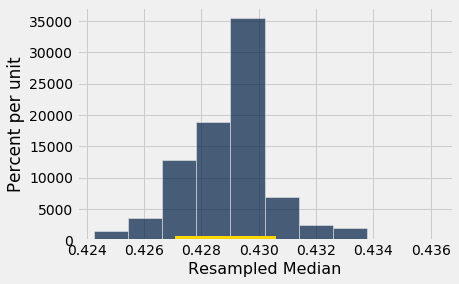

In [15]:
Table().with_column('Resampled Median', medians).hist()
plots.plot(interval_80, [0, 0], color='gold', lw=8)
print('80% Confidence interval for median weight/days ratio in population:')
print(np.round(interval_80, 3))

## Confidence Interval for a Population Mean: Bootstrap Percentile Method ##

In [24]:
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


Suppose we want to estimate the average age of the mothers in the population. A natural estimate is the average age of the mothers in the sample. Here is the distribution of their ages, and their average age which was about 27.2 years:

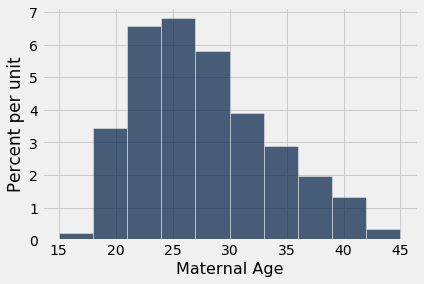

In [19]:
births.hist('Maternal Age')

In [20]:
np.mean(births.column('Maternal Age'))

27.228279386712096

What was the average age of the mothers in the population? We don’t know the value of this parameter.

Let’s estimate an interval for the unknown parameter by the bootstrap method:


In [22]:
# Bootstrap for mean

means = make_array()

for i in np.arange(5000):
    resampled = births.sample()
    mean = np.mean(resampled.column('Maternal Age'))
    means = np.append(means, mean)

The 95% confidence interval:

In [23]:
interval_95 = make_array(percentile(2.5, means), percentile(97.5, means))
interval_95

array([26.89778535, 27.56984668])

95% Confidence Interval for Mean Age
[26.89778535 27.56729131]


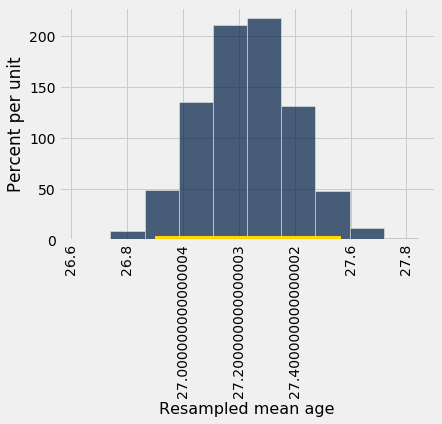

In [17]:
Table().with_column('Resampled mean age', means).hist()
plots.plot(interval_95, [0, 0], color='gold', lw=8)
print('95% Confidence Interval for Mean Age')
print(interval_95)

80% confidence interval:

In [18]:
interval_80 = make_array(percentile(10, means), percentile(90, means))
interval_80

array([27.01277683, 27.45400341])

80% Confidence Interval for Mean Age
[27.01277683 27.45400341]


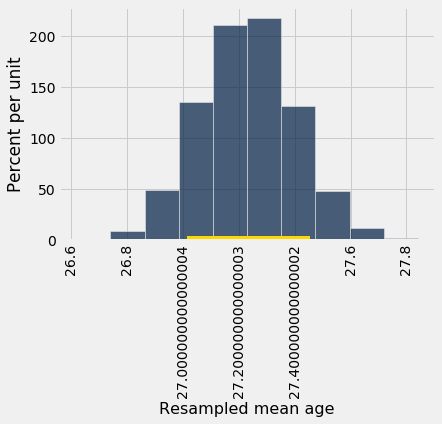

In [19]:
Table().with_column('Resampled mean age', means).hist()
plots.plot(interval_80, [0, 0], color='gold', lw=8)
print('80% Confidence Interval for Mean Age')
print(interval_80)

## Confidence Interval for a Population Proportion: Bootstrap Percentile Method ##

What percent of mothers in the population smoked during pregnancy? This is an unknown parameter which we can estimate by a bootstrap confidence interval. The steps in the process are analogous to those we took to estimate the population mean and median.

In the sample, 39% of the mothers smoked during pregnancy:

In [25]:
smoking = births.column('Maternal Smoker')
np.count_nonzero(smoking)/len(smoking)

0.3909710391822828

In [21]:
np.average(smoking)

0.3909710391822828

In [22]:
# Bootstrap for Proportion

proportions = make_array()

for i in np.arange(5000):
    resampled = births.sample()
    smoking = resampled.column('Maternal Smoker')
    proportion=np.count_nonzero(smoking)/len(smoking)
    proportions = np.append(proportions, proportion)

The 95% confidence interval:

In [23]:
interval_95 = make_array(percentile(2.5, proportions), percentile(97.5, proportions))
interval_95

array([0.36201022, 0.41908007])

95% Confidence Interval for Smoker Proportion
[0.36201022 0.41908007]


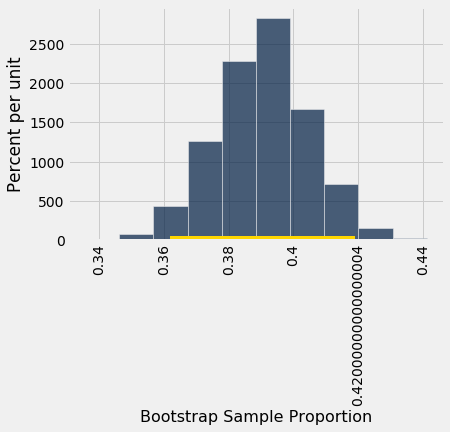

In [24]:
Table().with_column('Bootstrap Sample Proportion', proportions).hist()
plots.plot(interval_95, [0, 0], color='gold', lw=8)
print('95% Confidence Interval for Smoker Proportion')
print(interval_95)

The 80% confidence interval:

In [25]:
interval_80 = make_array(percentile(10, proportions), percentile(90, proportions))
interval_80

array([0.37223169, 0.4088586 ])

80% Confidence Interval for Smoker Proportion
[0.37223169 0.4088586 ]


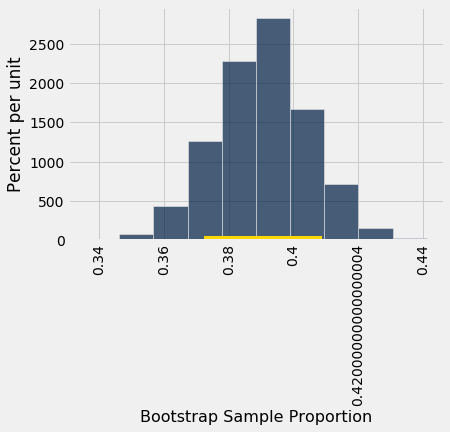

In [26]:
Table().with_column('Bootstrap Sample Proportion', proportions).hist()
plots.plot(interval_80, [0, 0], color='gold', lw=8)
print('80% Confidence Interval for Smoker Proportion')
print(interval_80)